In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
# Guardar o ficheiro numa Data Framedf_netflix = pd.read_csv('./datasets/netflix daily top 10.csv')

df_netflix = pd.read_csv("./datasets/netflix daily top 10.csv")

In [18]:
df_netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7100 entries, 0 to 7099
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   As of                 7100 non-null   object
 1   Rank                  7100 non-null   int64 
 2   Year to Date Rank     7100 non-null   object
 3   Last Week Rank        7100 non-null   object
 4   Title                 7100 non-null   object
 5   Type                  7100 non-null   object
 6   Netflix Exclusive     4599 non-null   object
 7   Netflix Release Date  7100 non-null   object
 8   Days In Top 10        7100 non-null   int64 
 9   Viewership Score      7100 non-null   int64 
dtypes: int64(3), object(7)
memory usage: 554.8+ KB


### 1) Extrair os tipos de dados disponiveis

In [19]:
# Para extrair os tipos de dados disponíveis vou guradá-los numa variável chamada "data_types"

data_types = df_netflix.dtypes
print(data_types)

As of                   object
Rank                     int64
Year to Date Rank       object
Last Week Rank          object
Title                   object
Type                    object
Netflix Exclusive       object
Netflix Release Date    object
Days In Top 10           int64
Viewership Score         int64
dtype: object


### 2) Período da análise feita

In [20]:
# Em primeiro lugar, vou ver em que coluna estão as datas da análise, para isso vou ver os 5 primeiros registos

df_netflix.head(5)

,As of,Rank,Year to Date Rank,Last Week Rank,Title,Type,Netflix Exclusive,Netflix Release Date,Days In Top 10,Viewership Score
0,2020-04-01,1,1,1,"Tiger King: Murder, Mayhem …",TV Show,Yes,"Mar 20, 2020",9,90
1,2020-04-01,2,2,-,Ozark,TV Show,Yes,"Jul 21, 2017",5,45
2,2020-04-01,3,3,2,All American,TV Show,NaN,"Mar 28, 2019",9,76
3,2020-04-01,4,4,-,Blood Father,Movie,NaN,"Mar 26, 2020",5,30
4,2020-04-01,5,5,4,The Platform,Movie,Yes,"Mar 20, 2020",9,55


##### estão guardados na primeira coluna chamada "As of"

In [21]:
# Como vimos antes, a coluna "As of" está no formato "object" e precisamos que esteja em "datetime"

df_netflix["As of"] = pd.to_datetime(df_netflix["As of"])

In [28]:
# Verificar se resultou
df_netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7100 entries, 0 to 7099
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   As of                 7100 non-null   datetime64[ns]
 1   Rank                  7100 non-null   int64         
 2   Year to Date Rank     7100 non-null   object        
 3   Last Week Rank        7100 non-null   object        
 4   Title                 7100 non-null   object        
 5   Type                  7100 non-null   object        
 6   Netflix Exclusive     4599 non-null   object        
 7   Netflix Release Date  7100 non-null   object        
 8   Days In Top 10        7100 non-null   int64         
 9   Viewership Score      7100 non-null   int64         
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 554.8+ KB


In [38]:
# Guardar o inicio e o fim do periodo de análise (que corresponde ao valor minimo e maximo da coluna "As of") e apresentar o resultado

period_start = df_netflix["As of"].min()
period_end = df_netflix["As of"].max()

print(f"A análise foi feita entre {period_start} e {period_end}")

A análise foi feita entre 2020-04-01 00:00:00 e 2022-03-11 00:00:00


### 3) Tamanho da base de dados (suponho que seja para calcular o numero de linhas e colunas)

In [47]:
number_rows, number_columns = df_netflix.shape
print("A base de dados tem {} linhas e {} colunas".format(number_rows, number_columns))

A base de dados tem 7100 linhas e 10 colunas


### 4) Verificar dados nulos

In [52]:
number_nulls = df_netflix.isnull().sum()
print(number_nulls)

As of                      0
Rank                       0
Year to Date Rank          0
Last Week Rank             0
Title                      0
Type                       0
Netflix Exclusive       2501
Netflix Release Date       0
Days In Top 10             0
Viewership Score           0
dtype: int64


In [54]:
# como a função acima retornou a contagem para cada coluna, temos de voltar a somar esta contagem para ter o numero total de nulls

total_nulls = number_nulls.sum()
print(f"A base de dados tem {total_nulls} dados nulos")

A base de dados tem 2501 dados nulos


### 5) Outliers

In [55]:
df_netflix.describe()

,As of,Rank,Days In Top 10,Viewership Score
count,7100,7100.000000,7100.000000,7100.000000
mean,2021-03-21 12:00:00.000000256,5.500000,24.123662,122.790141
min,2020-04-01 00:00:00,1.000000,1.000000,1.000000
25%,2020-09-25 00:00:00,3.000000,3.000000,19.000000
50%,2021-03-21 12:00:00,5.500000,7.000000,50.000000
75%,2021-09-15 00:00:00,8.000000,18.000000,128.000000
max,2022-03-11 00:00:00,10.000000,428.000000,1474.000000
std,NaN,2.872484,58.473789,213.861642


##### só faz sentido analisar os outliers para as colunas "numéricas" excepto para a coluna "As of"

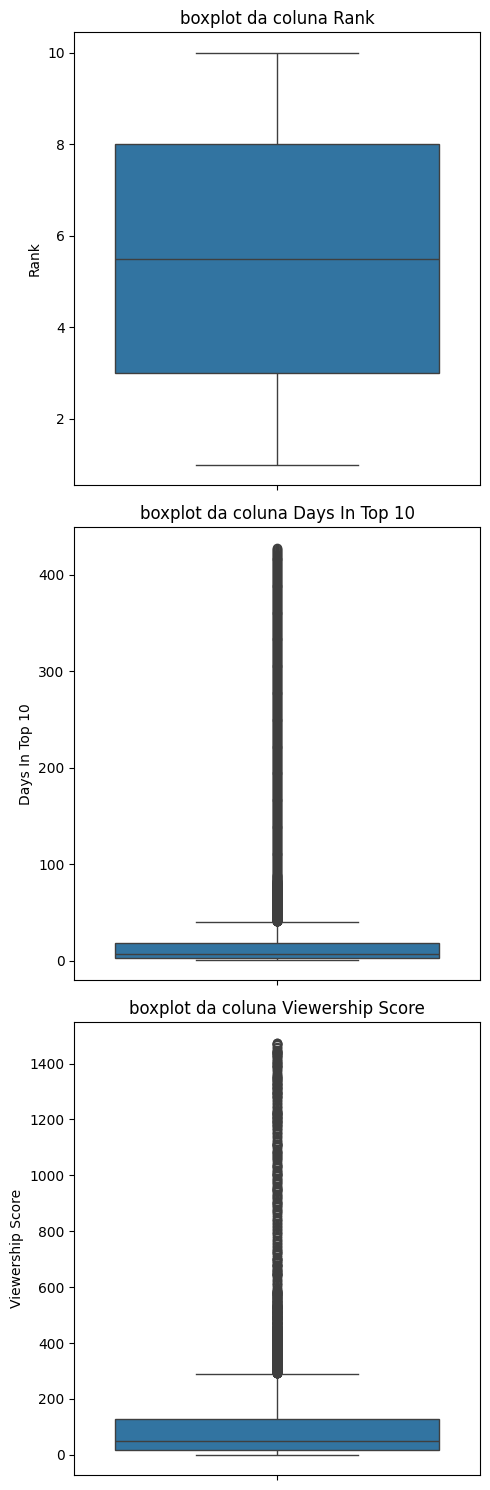

In [83]:
# instanciar as colunas que queremos:
columns_to_analyze = ["Rank", "Days In Top 10", "Viewership Score"]

# Criar boxplots para ver os outliers:
plt.figure(figsize=(5,15))
for i, col in enumerate(columns_to_analyze, 1):
    plt.subplot(3, 1, i)
    sns.boxplot(df_netflix[col])
    plt.title(f'boxplot da coluna {col}')
plt.tight_layout()
plt.show()

(array([6422.,  333.,   46.,   42.,   43.,   43.,   42.,   43.,   43.,
          43.]),
 array([  1. ,  43.7,  86.4, 129.1, 171.8, 214.5, 257.2, 299.9, 342.6,
        385.3, 428. ]),
 <BarContainer object of 10 artists>)

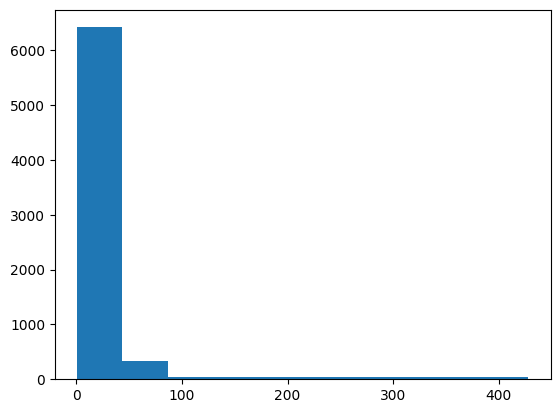

In [93]:
# Histograma da Coluna days in top 10 para ver os outliers

plt.hist(df_netflix["Days In Top 10"])

(array([5559.,  856.,  301.,  137.,   40.,   28.,   42.,   36.,   50.,
          51.]),
 array([1.0000e+00, 1.4830e+02, 2.9560e+02, 4.4290e+02, 5.9020e+02,
        7.3750e+02, 8.8480e+02, 1.0321e+03, 1.1794e+03, 1.3267e+03,
        1.4740e+03]),
 <BarContainer object of 10 artists>)

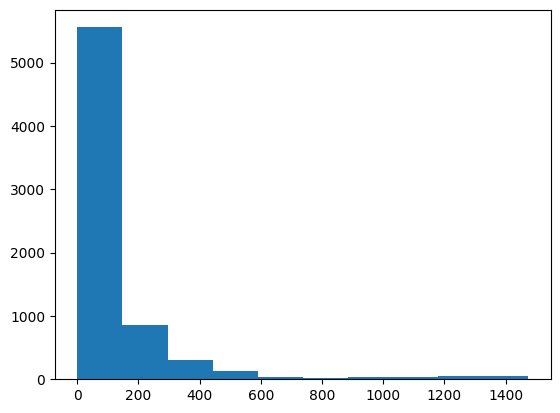

In [95]:
# Histograma da Coluna Viwership Score para ver os outliers

plt.hist(df_netflix["Viewership Score"])